## Grandma's bread shop

Try to clusterize the Grandma's bread shop customers by item and by date. Then try to explain how are the clusters (cluster EDA).

####  Data cleaning/navigation

In [1]:
import pylab as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
# Run this code

df=pd.read_csv('data/breadbasket_dms.csv')

df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
df.Item.nunique()

95

In [4]:
df.Item.value_counts().nlargest(11)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

#### TOP 10

In [5]:
top10= ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']

In [6]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

#### Time

In [7]:
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time,
                                      format='%Y-%m-%d %H:%M:%S')

In [8]:
df['day'] = df.Datetime.dt.day_name()
df['hour'] = df.Datetime.dt.hour
df['month'] = df.Datetime.dt.month

In [9]:
df = pd.get_dummies(df, columns = ['Item'] , drop_first=False)

In [10]:
new_columns = [k.replace('Item_','').replace('day_', '') for k in df.columns] 
df=df.rename(columns={k:v for k,v in zip(df.columns, new_columns)})

In [11]:
df_group = df.groupby(['Datetime', 'Transaction']).sum()
df_group.reset_index(level='Datetime', inplace=True)
df_group.head()

,Datetime,hour,month,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,9,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,20,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:08:41,10,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2016-10-30 10:13:03,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_group = df_group.drop('Datetime', axis=1)

#### PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

pca.fit(df_group)

print(df_group.shape)

pca.explained_variance_ratio_

(9531, 97)


array([7.57347644e-01, 2.38875375e-01, 8.80758290e-04, 4.81528245e-04,
       2.30860933e-04, 1.99386862e-04, 1.86580821e-04, 1.59697955e-04,
       1.46751446e-04, 1.26224801e-04, 1.17143942e-04, 1.05213804e-04,
       8.02806112e-05, 7.57460521e-05, 7.30919202e-05, 7.27940335e-05,
       6.98726429e-05, 6.49503444e-05, 6.23243131e-05, 5.63124795e-05,
       4.95520355e-05, 4.15982300e-05, 3.64742944e-05, 3.29717750e-05,
       3.20520292e-05, 3.03426602e-05, 2.86964997e-05, 2.79036358e-05,
       2.51356395e-05, 2.41664344e-05, 2.38532070e-05, 2.06494927e-05,
       1.73176279e-05, 1.51974874e-05, 1.37375445e-05, 1.24516687e-05,
       1.16483985e-05, 1.12604370e-05, 1.05234481e-05, 9.81881779e-06,
       9.46032293e-06, 8.04697861e-06, 7.32541025e-06, 6.52033886e-06,
       5.66704519e-06, 5.54997726e-06, 4.40156608e-06, 3.59942401e-06,
       3.34106630e-06, 3.14538995e-06, 2.78950414e-06, 2.60601745e-06,
       2.53668272e-06, 2.41492169e-06, 2.39043917e-06, 2.33948313e-06,
      

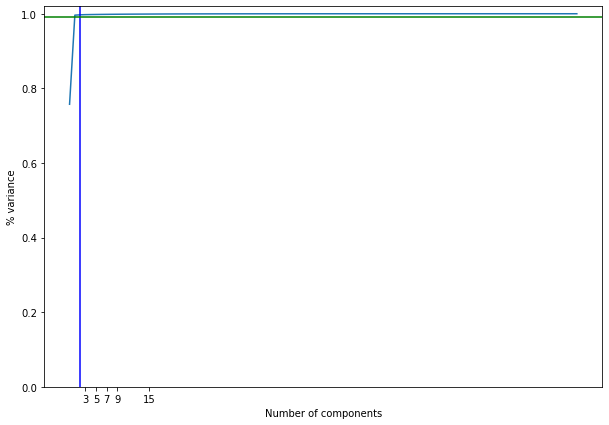

In [15]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.xticks([3, 5, 7, 9, 15])
plt.axvline(x=2, color = 'b')
plt.axhline(y=0.99, color = 'g')
plt.ylabel('% variance')
plt.ylim([0, 1.02]);

In [16]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9962230183084086

In [17]:
pca = PCA(n_components=2).fit_transform(df_group)

pca_df = pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(2)])

pca_df.head()

,pc_1,pc_2
0,-17.717219,-5.856571
1,-3.305131,-9.487240
2,10.233380,-13.585845
3,-16.836425,-5.385123
4,10.244527,-13.585366


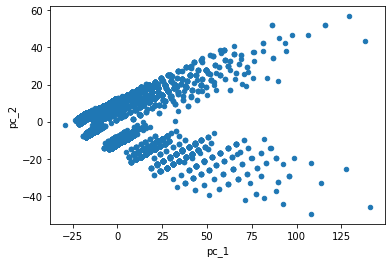

In [18]:
pca_df.plot.scatter(x='pc_1', y='pc_2');

#### KMeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters=2).fit(pca_df)

In [21]:
df_group['label']=kmeans.predict(pca_df)

df_group.head()

,hour,month,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,label
Transaction,,,,,,,,,,,,,,,,,,,,,
1,9,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,30,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
cm=sns.light_palette('orange', as_cmap=True)

pd.crosstab(df_group.hour, df_group.label).style.background_gradient(cmap=cm)

label,0,1
hour,,
1,1,0
7,7,0
8,184,0
9,388,0
10,463,0
11,536,0
12,504,0
13,398,0
14,367,0


In [23]:
pd.crosstab(df_group.month, df_group.label).style.background_gradient(cmap=cm)

label,0,1
month,,
1,619,0
2,1018,0
3,783,54
4,705,124
5,0,73
6,706,104
7,0,14
8,185,150
9,213,103


In [24]:
pd.crosstab(df_group['Bread'], df_group.label).style.background_gradient(cmap=cm)

label,0,1
Bread,,
0,4936,1498
1,2136,744
2,89,117
3,4,7


In [25]:
pd.crosstab(df_group['Afternoon with the baker'], df_group.label).style.background_gradient(cmap=cm)

label,0,1
Afternoon with the baker,,
0,7131,2357
1,33,9
2,1,0


In [26]:
pd.crosstab(df_group['Baguette'], df_group.label).style.background_gradient(cmap=cm)

label,0,1
Baguette,,
0,7035,2344
1,130,22


In [27]:
pd.crosstab(df_group['Bakewell'], df_group.label).style.background_gradient(cmap=cm)

label,0,1
Bakewell,,
0,7142,2341
1,23,25


In [28]:
pd.crosstab(df_group['Alfajores'], df_group.label).style.background_gradient(cmap=cm)

label,0,1
Alfajores,,
0,7040,2147
1,121,198
2,4,21


#### Clusters comparison

In [29]:
df_group[df_group.label ==0].describe()[['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']]

,Coffee,Bread,Tea,Cake,Pastry,Sandwich,Medialuna,Hot chocolate,Cookies,Brownie
count,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000
mean,0.449407,0.324634,0.102582,0.065318,0.072156,0.044941,0.045499,0.033217,0.034473,0.024006
std,0.582754,0.497467,0.313836,0.251581,0.270888,0.215121,0.216943,0.187587,0.185489,0.153077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [30]:
df_group[df_group.label ==1].describe()[['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie']]

,Coffee,Bread,Tea,Cake,Pastry,Sandwich,Medialuna,Hot chocolate,Cookies,Brownie
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,0.951395,0.422232,0.295858,0.235418,0.143280,0.189772,0.122570,0.148774,0.123838,0.087489
std,0.791982,0.600631,0.513208,0.456974,0.372653,0.474193,0.352853,0.388868,0.356584,0.282611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000


Top 10 products are consumed more in cluster 0 rather than on cluster 1